In [1]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
#library("ggh4x")
library(ggpubr)
library(ggrepel)
library('ggpmisc')

Loading required package: permute

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ggpubr’



In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list

tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

# Convert taxonomy info to data frame with correct taxonomy labels

taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11,
12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) 

In [4]:
ps_pre= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps_pre

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps_pre, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


ps=subset_taxa(ps, Phylum!="NA")
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
ps_homgenate=subset_samples(ps_pre, Type=="Homogenate")
ps_homgenate


ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_Clipped= subset_samples(ps_Clipped, filter_unpair=="no")
ps_Clipped


ps_Am_Pl_c =subset_samples(ps_Clipped, Combo=="Ambient_Placebo")
ps_Am_Pl_c

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 7 samples ]
sample_data() Sample Data:       [ 7 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 151 samples ]
sample_data() Sample Data:       [ 151 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_clip
                                                  
                                                      
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.15*length(x)), TRUE)
ps_fill_pair  
                           

ps_Am_Pl_c_fill = filter_taxa(ps_Am_Pl_c, function(x) sum(x > 5) > (0.15*length(x)), TRUE)
ps_Am_Pl_c_fill                          

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 97 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 97 tips and 80 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 65 taxa and 151 samples ]
sample_data() Sample Data:       [ 151 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 65 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 65 tips and 51 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 42 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 42 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 42 tips and 35 internal nodes ]

In [8]:

ps_clr_clip <- microbiome::transform(ps_fill_clip, 'clr')
psr_clr.ord_clip <- ordinate(ps_clr_clip, "RDA", "euclidean")


ps_clr_fill_pair <- microbiome::transform(ps_fill_pair, 'clr')
ps_clr.ord_fill_pair <- ordinate(ps_clr_fill_pair, "RDA", "euclidean")


ps_Am_Pl_c_clr <- microbiome::transform(ps_Am_Pl_c_fill , 'clr')
ps_Am_Pl_c_ord <- ordinate(ps_Am_Pl_c_clr, "RDA", "euclidean")

sample_df <- data.frame(sample_data(ps_clr_clip))

sample_df %>%
  mutate(TimeGroup = ifelse(TimePoint <= 10, "1-10", "11-19")) %>%
  group_by(Combo, Health, TimeGroup) %>%
  summarize(count = n(), .groups = "drop") %>%
  arrange(TimeGroup)



Combo,Health,TimeGroup,count
<chr>,<chr>,<chr>,<int>
Ambient_Placebo,DL,1-10,1
NH4_Pathogen,DL,1-10,1
NH4_Placebo,DL,1-10,13
Ambient_Pathogen,AH,11-19,8
Ambient_Pathogen,DL,11-19,22
Ambient_Placebo,AH,11-19,30
NH4_Pathogen,AH,11-19,20
NH4_Pathogen,DL,11-19,28
NH4_Placebo,AH,11-19,43


## Figure 1

In [9]:
sum_ps_clipped = ps_Clipped %>%
  tax_glom(taxrank = "ASVs") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()


In [10]:
sum_ps_Am_Pl_c_order  <- ps_Am_Pl_c %>%
 tax_glom(taxrank = "Order") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

# list of OTUs to retain
selected_otus <- sum_ps_Am_Pl_c_order %>%
  filter(Abundance > 0.1) %>%
  distinct(OTU) %>%
  pull(OTU)
selected_otus

# Filter the full dataframe to keep only those OTUs
filtered_sum_ps_clipped<- sum_ps_clipped %>%
  filter(OTU %in% selected_otus)

#list of ASVs (OTUs)
ps_filtered_clipped=subset_taxa(ps_Clipped, taxa_names(ps_Clipped) %in% selected_otus)


[1] "ff3e7637bd5aac86cff3b72f9ee78f47" "3af784892462923aa0bdd45788f7e9b7"
[3] "a3c29bcb6997cfe572a474e58291af1d" "317148b78ed8ecbf25c5448e8b5e0cf5"
[5] "68dd9c00e0187d0e3541a2535f1290d9"

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the qiime2R package.
  Please report the issue to the authors.”
Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message in compute_group(...):
“CI computation error: Error in check_output(cint, probs = probs, parameter_range = c(0, 1)): out[1] <= out[2] is not TRUE
”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message in compute_group(...):
“CI computation error: Error in check_output(cint, probs = probs, parameter_range = c(0, 1)): out[1] <= out[2] i

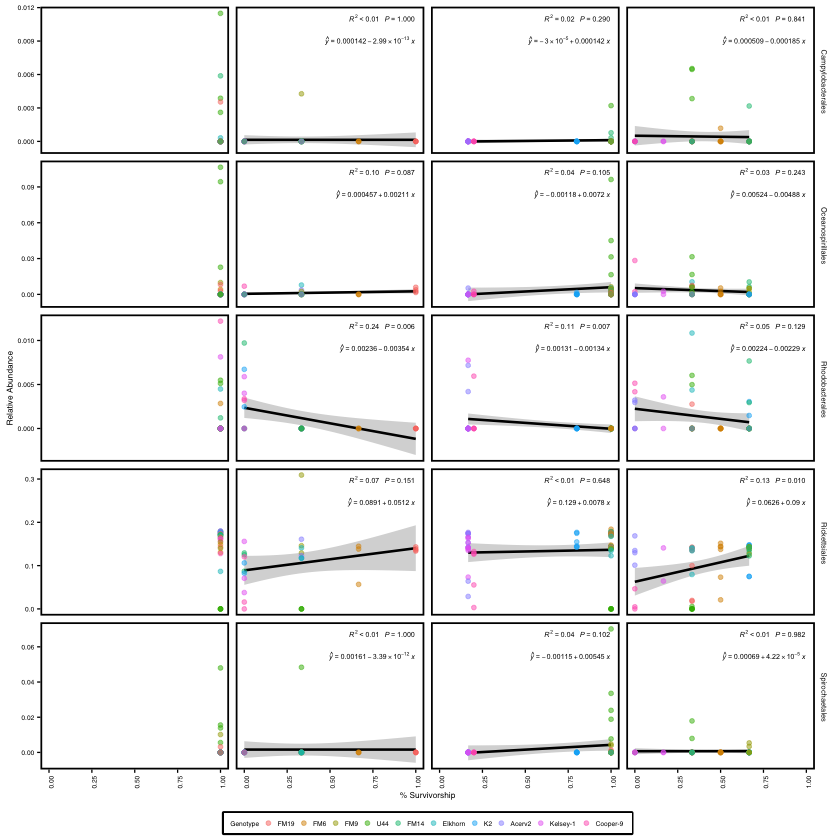

In [11]:

lab1 <- c(expression(Ambient+P),
          expression(Ambient+D), 
          expression(NH[4]+P),
          expression(NH[4]+D))


filtered_sum_ps_clipped$Combo <- factor(
  filtered_sum_ps_clipped$Combo, 
  levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen")
)

filtered_sum_ps_clipped$Genotype <- factor(filtered_sum_ps_clipped$Genotype, levels = c(
  "FM19", "FM6", "FM9", "U44", "FM14", "Elkhorn", "K2",
  "Acerv2", "Kelsey-1", "Cooper-9", "U41"
))

Fig_corr <- filtered_sum_ps_clipped %>%
  mutate(across(where(is.character), ~ str_replace_all(., "o__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(., "f__", ""))) %>%
  ggplot(aes(x = surv, y = Abundance)) +
  geom_smooth(method = lm, formula = y ~ x, color = "black") +
  geom_point(aes(color = Genotype), alpha = 0.5) +

  stat_poly_eq(
    formula = y ~ x,
    eq.with.lhs = "italic(hat(y))~`=`~",
    aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")), 
    parse = TRUE,
    label.y = "top",
    label.x = "right",
    color = "black",
    rr.digits = 2,
    size = 1.5
  ) +
  stat_poly_eq(
    aes(label = paste(..eq.label.., sep = "~~~")), 
    label.y = 0.8,
    eq.with.lhs = "italic(hat(y))~`=`~",
    eq.x.rhs = "~italic(x)",
    formula = y ~ x,
    parse = TRUE,
    rr.digits = 2,
    size = 1.5,
    label.x = "right",
    color = "black"
  ) +

  theme_q2r() +
  facet_grid(Order ~ Combo, scales = "free_y", labeller = labeller(
    Combo=lab1
  )) +

  labs(
    y = "Relative Abundance",
    x = "% Survivorship",
    color = "Genotype"
  ) +

  theme(

    strip.background = element_blank(),
    strip.text.x = element_blank(),
    strip.text.y = element_text(size = 4.5),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4),
    legend.position = "bottom",
    legend.box = "horizontal",
    legend.direction = "horizontal",
    legend.box.background = element_rect(color = "black", fill = "lightgray", size = 1),
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.y = element_text(size = 4),
    axis.text.x = element_text(size = 4, angle = 90, hjust = 1)
    
  ) +
  guides(color = guide_legend(keywidth = 0.2, keyheight = 0.3, nrow = 1))

Fig_corr



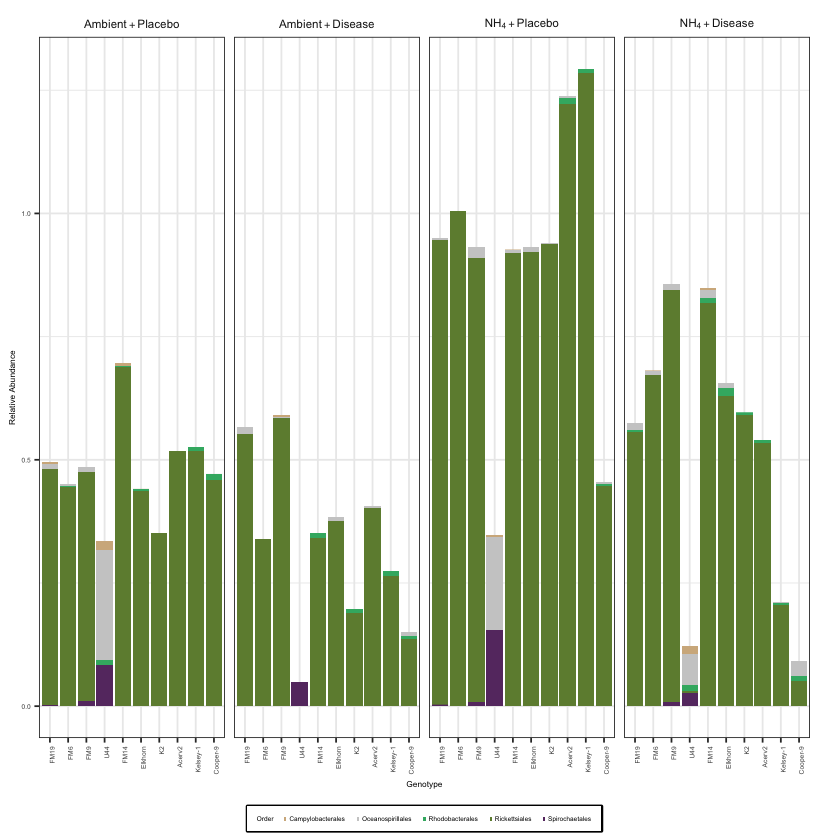

In [12]:
# Factor levels
filtered_sum_ps_clipped$Diseased <- factor(filtered_sum_ps_clipped$Diseased, 
   levels = c("Placebo", "Pathogen"))

filtered_sum_ps_clipped$Genotype <- factor(filtered_sum_ps_clipped$Genotype, levels = c(
  "FM19", "FM6", "FM9", "U44", "FM14", "Elkhorn", "K2",
  "Acerv2", "Kelsey-1", "Cooper-9", "U41"
))

# Labellers
combo_labs <- as_labeller(c(
  "Ambient_Placebo" = "Ambient+Placebo",
  "Ambient_Pathogen" = "Ambient+Disease",
  "NH4_Placebo" = "NH[4]+Placebo",
  "NH4_Pathogen" = "NH[4]+Disease"
), default = label_parsed)

# Plot
Fig_RA <- filtered_sum_ps_clipped %>%
  mutate(across(where(is.character), ~ str_replace_all(., "o__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(., "_", " "))) %>%
  ggplot(aes(x = Genotype, y = Abundance, fill = Order)) + 
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c(
    "tan",  "gray80", "#3CB371",
    "darkolivegreen4", "#673770", "#D14285", "#8569D5", "#5E738F", "lightblue",
    "salmon", "Navy", "#CBD588", "lightblue4", "ivory4", "darkorchid",
    "palevioletred1", "#DA5724", "#8fa746", "#404b1f", "#8FBC8F", "khaki1",
    "#41636f", "#00AEEF", "#8bbfd2", "brown", "#AD6F3B"
  )) +
  facet_grid(Type ~ Combo, space = "free", labeller = labeller(Combo = combo_labs
    )) +
  labs(
    x = "Genotype",
    y = "Relative Abundance",
    fill = "Order"
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 4),
    axis.text.y = element_text(size = 4),
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    strip.text.x = element_text(size = 7, face="bold"),
    strip.text.y = element_text(size = 4, color = NA),
    strip.background = element_blank(),
    legend.box.background = element_rect(color = "black", fill = "lightgray", size = 1),
    legend.position = "bottom",
    legend.box = "horizontal",
    legend.direction = "horizontal",
    legend.text = element_text(size = 3.9, margin = margin(r = .05, unit = "pt")),
    legend.title = element_text(size = 4)) +
  guides(fill = guide_legend(keywidth = 0.2, keyheight = 0.2, nrow = 1))

Fig_RA

Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message in compute_group(...):
“CI computation error: Error in check_output(cint, probs = probs, parameter_range = c(0, 1)): out[1] <= out[2] is not TRUE
”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message in compute_group(...):
“CI computation error: Error in check_output(cint, probs = probs, parameter_range = c(0, 1)): out[1] <= out[2] is not TRUE
”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message in compute_group(...):
“CI computation error: Error in check_output(cint, probs = probs, parameter_range = c(0, 1)): out[1] <= out[2] is not TRUE
”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2,

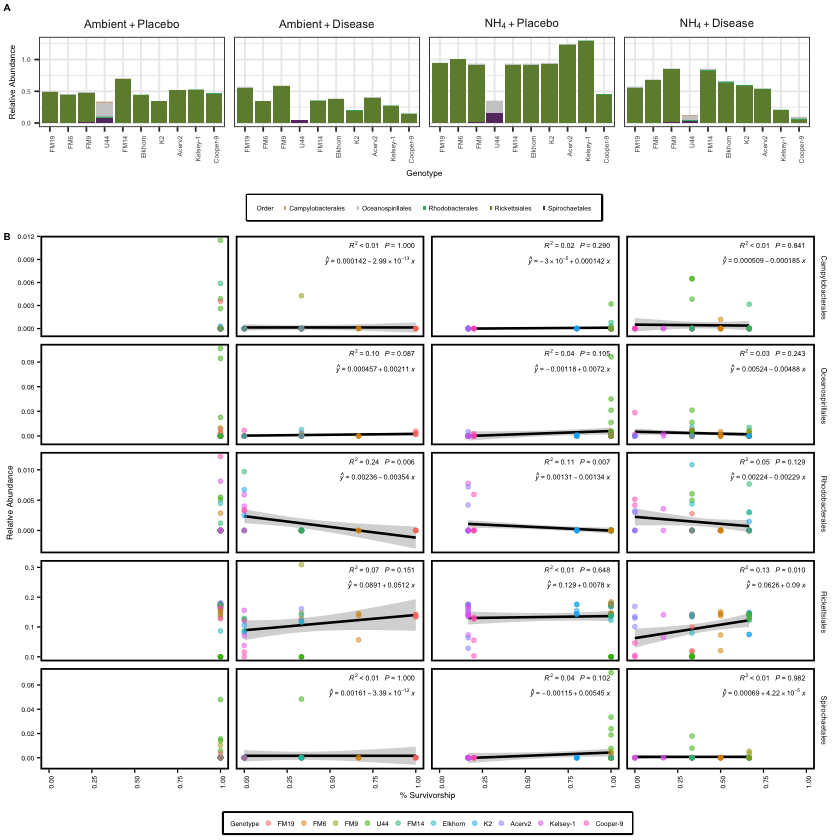

In [13]:
comboRA_Corr= ggpubr::ggarrange(Fig_RA, Fig_corr,
                  common.legend = FALSE, ncol=1,  heights = c(0.75, 2),
                labels = c("A", "B"), font.label = list(size = 6))
comboRA_Corr
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Fig1.png", 
      width = 4, height = 5.5, units = "in", dpi=300)

## Figure 2

In [14]:
ps_clr_clip <- microbiome::transform(ps_fill_clip, 'clr')
psr_clr.ord_clip <- ordinate(ps_clr_clip, "RDA", "euclidean")


ps_clr_fill_pair <- microbiome::transform(ps_fill_pair, 'clr')
ps_clr.ord_fill_pair <- ordinate(ps_clr_fill_pair, "RDA", "euclidean")



In [15]:

lab1 <- c(expression(Ambient+P),
          expression(Ambient+D), 
          expression(NH[4]+P),
          expression(NH[4]+D))


lab2 <- c(expression(Visually~Healthy),
          expression(Visually~Diseased))
supp.labs <- c("Placebo" = "Placebo", "Pathogen" = "Diseased")

my_labeller <- as_labeller(c(Ambient="Ambient", NH4="NH[4]"),
                           default = label_parsed)


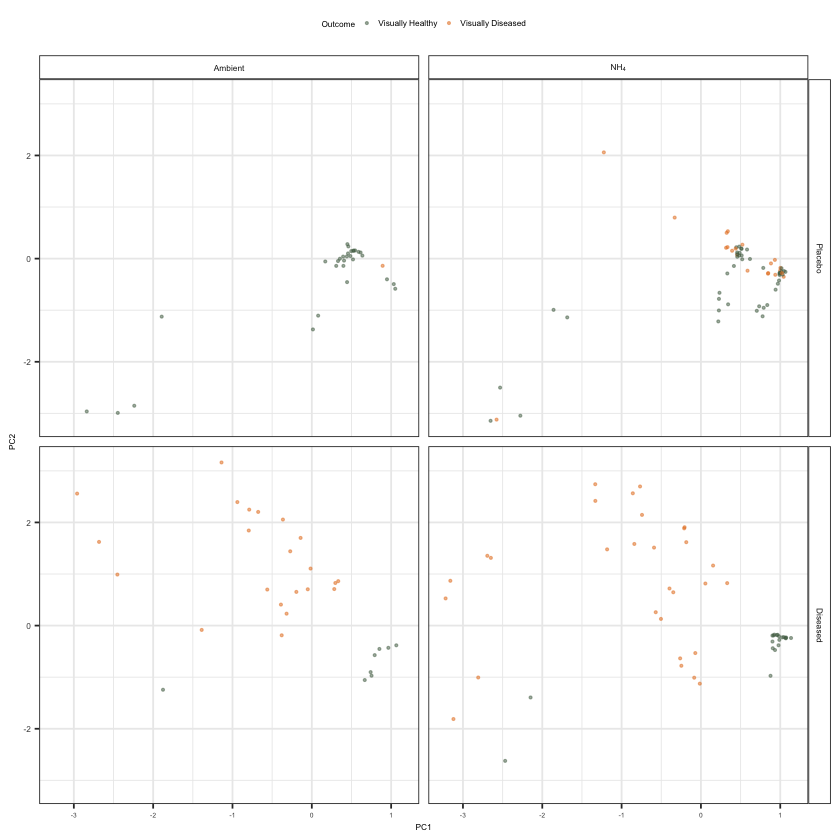

In [16]:
# Extract the ordination coordinates as a data.frame
ord_data <- plot_ordination(ps_clr_clip, psr_clr.ord_clip, justDF = TRUE)

# Add metadata
ord_data$Genotype <- sample_data(ps_clr_clip)$Genotype
ord_data$Health <- sample_data(ps_clr_clip)$Health
ord_data$Nutrients <- sample_data(ps_clr_clip)$Nutrients
ord_data$Diseased <- sample_data(ps_clr_clip)$Diseased

# Set factor levels
ord_data$Diseased <- factor(ord_data$Diseased, levels = c("Placebo", "Pathogen"))

# Rebuild the plot
ord_combo <- ord_data %>%

ggplot(aes(PC1, PC2, 
           color = Health,
          
          )) +
 #geom_point() +
  geom_point(size = .5, alpha = 0.5) +  # Custom alpha here
  #geom_text_repel(aes(label = Genotype), size = 1, max.overlaps = 100, force=0.5) +
  facet_grid(Diseased ~ Nutrients, labeller = labeller(
    Nutrients = my_labeller, 
    Diseased = supp.labs,
    .default = label_parsed
  )) +
  scale_color_manual("Outcome", values = c("#516b51", "#e67e22"), labels = lab2) +
  theme_bw() +
  theme(
    strip.background = element_rect(fill = "white"),
    legend.position = 'top',
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 5),
    strip.text.x = element_text(size = 5),
    strip.text.y = element_text(size = 5)
  ) +
  guides(color = guide_legend(keywidth = 0.2, keyheight = 0.4, nrow=1), shape=guide_legend(ncol=1))

ord_combo
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ord_clipped.png", 
 #     width = 5.5, height = 4, units = "in", dpi=300)

In [17]:
ps_clr_meta= as(sample_data(ps_clr_clip), "data.frame")

#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_clr_clip)), method ="euclidean")

mod <- betadisper(ps_clr, sample_data(ps_clr_clip)$Combo)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod

mod_dist= as.data.frame(mod$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_clr_clip), mod_dist) 
head(mod_dist)


	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_clr, group = sample_data(ps_clr_clip)$Combo)

No. of Positive Eigenvalues: 96
No. of Negative Eigenvalues: 0

Average distance to median:
Ambient_Pathogen  Ambient_Placebo     NH4_Pathogen      NH4_Placebo 
           18.10            11.14            17.46            11.94 

Eigenvalues for PCoA axes:
(Showing 8 of 96 eigenvalues)
PCoA1 PCoA2 PCoA3 PCoA4 PCoA5 PCoA6 PCoA7 PCoA8 
11161  8261  4157  2986  2556  1833  1374  1225 

[1] 174   1

,mod$distances
,<dbl>
N10-A019,10.387107
N11-A153,7.675457
N115-247,23.308024
N12-A008,9.129885
N13-A038,11.241062
N14-A040,7.740826


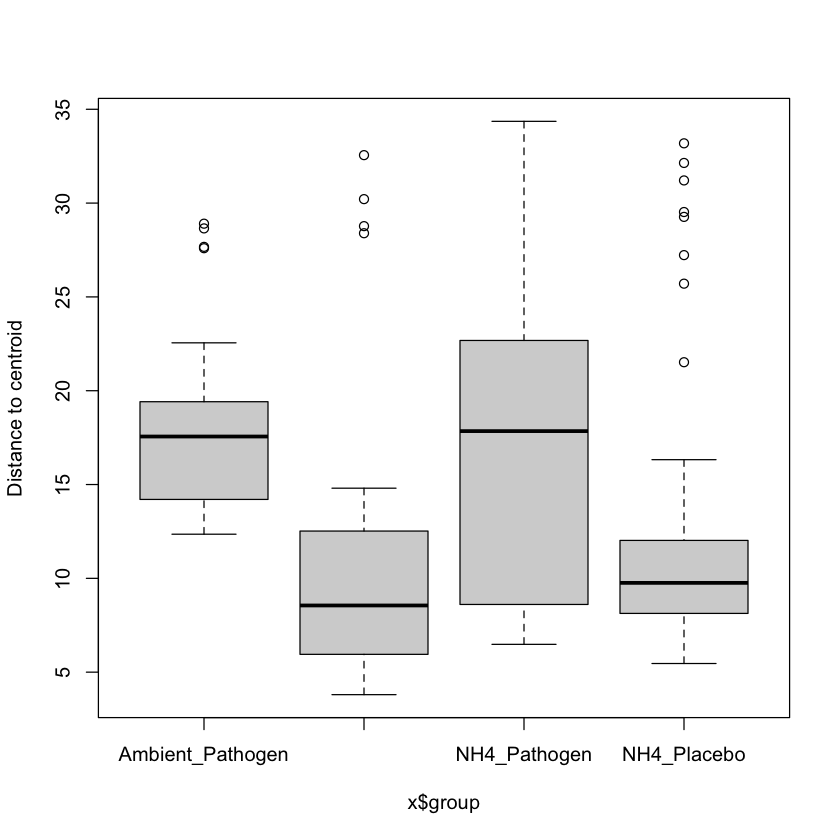

In [18]:
boxplot(mod)

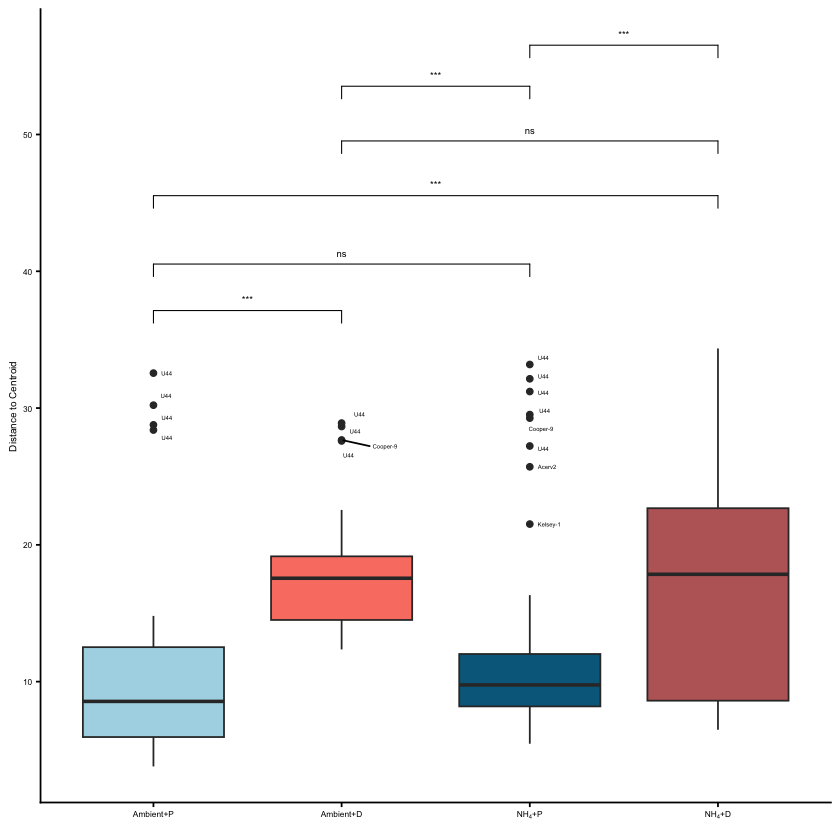

In [19]:
my_comparisons <- list(
  c("Ambient_Placebo", "Ambient_Pathogen"),
  c("Ambient_Placebo", "NH4_Placebo"),
  c("Ambient_Placebo", "NH4_Pathogen"),
c("Ambient_Pathogen", "NH4_Pathogen"),
 c("Ambient_Pathogen", "NH4_Placebo"),
c("NH4_Placebo", "NH4_Pathogen")    
)

mod_dist_df$Combo <- factor(
  mod_dist_df$Combo, 
  levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen"))


#Add an internal distances column if needed
mod_dist_df$Distance <- mod$distances  # Add distances as a column

#Compute outliers
outliers_df <- mod_dist_df %>%
  group_by(Combo) %>%
  mutate(Q1 = quantile(Distance, 0.25),
         Q3 = quantile(Distance, 0.75),
         IQR = Q3 - Q1,
         is_outlier = Distance < (Q1 - 1.5 * IQR) | Distance > (Q3 + 1.5 * IQR)) %>%
  filter(is_outlier)

# Plot, labeling only outliers
combo_cent <- ggplot(mod_dist_df, aes(x = Combo, y = Distance)) +
  geom_boxplot(aes(fill = Combo)) +
  #geom_jitter(height = 0, width = 0.2) +
  geom_text_repel(data = outliers_df,
                  aes(label = Genotype),
                  size = 1.25,
                  nudge_x = 0.05,
                  max.overlaps = Inf) +
  theme_classic() +
  scale_fill_manual(values = c("lightblue", "salmon", "#00688B", "#bc6767")) +
  theme(
    legend.position = "none",
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    axis.title.x = element_text(size = 4),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 5),
    axis.text.y = element_text(size = 5)
  ) +
  scale_x_discrete(labels = c(
       "Ambient_Placebo" = "Ambient+P",
    "Ambient_Pathogen" = "Ambient+D", 
    "NH4_Pathogen" = expression(paste(NH[4], "+D")), 
    "NH4_Placebo" = expression(paste(NH[4], "+P"))
  )) +
  xlab("") +
  ylab("Distance to Centroid") +

# Statistical comparisons
  stat_compare_means(
    comparisons = my_comparisons,
    label.y = c(35.6, 39, 44, 48, 52, 55),
    aes(label = after_stat(p.signif)), size = 2,
      symnum.args = list(
    cutpoints = c(0, 0.001, 0.01, 0.05, 1),
    symbols = c("***", "***", "*", "ns")
  ))


combo_cent


In [20]:
ps_Clipped_fil = filter_taxa(ps_Clipped, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_Clipped_fil

ps_rare<- phyloseq::rarefy_even_depth(ps_Clipped_fil, rngseed = 123, replace = FALSE, sample.size=12478)             
adiv <- data.frame(
  "Simpson" = phyloseq::estimate_richness(ps_rare, measures = "Simpson"),
  "Shannon" = phyloseq::estimate_richness(ps_rare, measures = "Shannon"),
  "Combo" = phyloseq::sample_data(ps_rare)$Combo) %>% rownames_to_column("sample_names")
head(adiv)
                             
df_clip <- meta %>%
  right_join(adiv,
            by = "sample_names") 
dim(df_clip)


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6432 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 6432 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 6432 tips and 5738 internal nodes ]

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

1 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


N131-200

...

191OTUs were removed because they are no longer 
present in any sample after random subsampling


...



,sample_names,Simpson,Shannon,Combo
,<chr>,<dbl>,<dbl>,<chr>
1,N10-A019,0.9136701,2.667239,NH4_Placebo
2,N11-A153,0.8914250,2.306571,NH4_Placebo
3,N115-247,0.9827763,4.329426,NH4_Pathogen
4,N12-A008,0.8949002,2.372131,NH4_Placebo
5,N13-A038,0.9063230,2.582413,NH4_Placebo
6,N14-A040,0.8887895,2.243536,NH4_Placebo


[1] 173  65

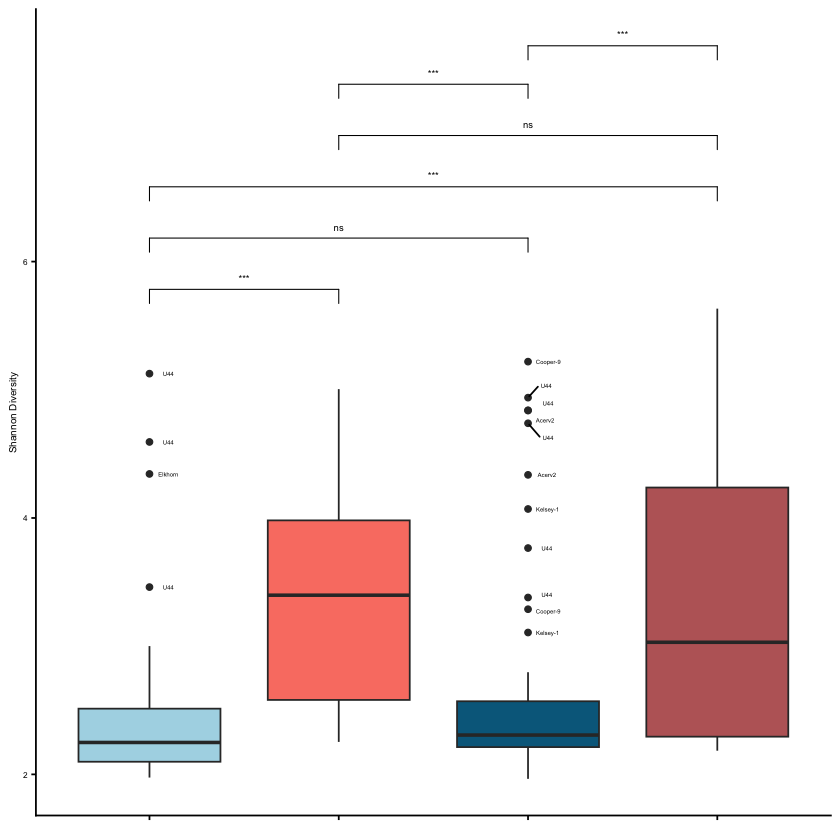

In [21]:
df_clip$Combo.y <- factor(
 df_clip$Combo.y, 
  levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen"))


# Step 1: Filter and calculate outliers
meta_outliers <- df_clip %>%
#filter(Type=="Clipped") %>%
#filter(Pairs=="Paired") %>%
  #filter(Shannon > 0) %>%
  group_by(Combo.y) %>%
  mutate(Shannon = as.numeric(Shannon),
         Q1 = quantile(Shannon, 0.25),
         Q3 = quantile(Shannon, 0.75),
         IQR = Q3 - Q1,
         is_outlier = Shannon < (Q1 - 1.5 * IQR) | Shannon > (Q3 + 1.5 * IQR)) %>%
  filter(is_outlier)

#  Create the plot with outlier labels
combo_shanon <- df_clip %>%
  #filter(Shannon > 0) %>%
  mutate(Shannon = as.numeric(Shannon)) %>%
  ggplot(aes(x = Combo.y, y = Shannon)) +
  geom_boxplot(aes(fill = Combo.y)) +
  #geom_jitter(aes(fill = Combo), height = 0, width = 0.2) +
  geom_text_repel(data = meta_outliers,
                  aes(label = Genotype),
                  size = 1.25,
                  nudge_x = 0.1,
                  max.overlaps = Inf) +
  theme_classic() +
  scale_fill_manual(values = c("lightblue", "salmon", "#00688B", "#bc6767")) +
  labs(y = "Shannon Diversity", x = "") +
  theme(
    legend.position = "none",
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    axis.title.x = element_text(size = 4),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 5)
  ) +
  scale_x_discrete(labels = c(
       "Ambient_Placebo" = "Ambient+P",
    "Ambient_Pathogen" = "Ambient+D", 
    "NH4_Pathogen" = expression(paste(NH[4], "+D")), 
    "NH4_Placebo" = expression(paste(NH[4], "+P"))
  )) +

# Statistical comparisons
  stat_compare_means(
    comparisons = my_comparisons,
    label.y = c(5.6, 6, 6.4, 6.8, 7.2, 7.5),
    aes(label = after_stat(p.signif)), size = 2,
       symnum.args = list(
    cutpoints = c(0, 0.001, 0.01, 0.05, 1),
    symbols = c("***", "**", "*", "ns")
  ))


combo_shanon


In [22]:
comboAB= ggpubr::ggarrange(combo_shanon, combo_cent,
                  common.legend = FALSE, ncol=1,
                labels = c("A", "B"), font.label = list(size = 9))

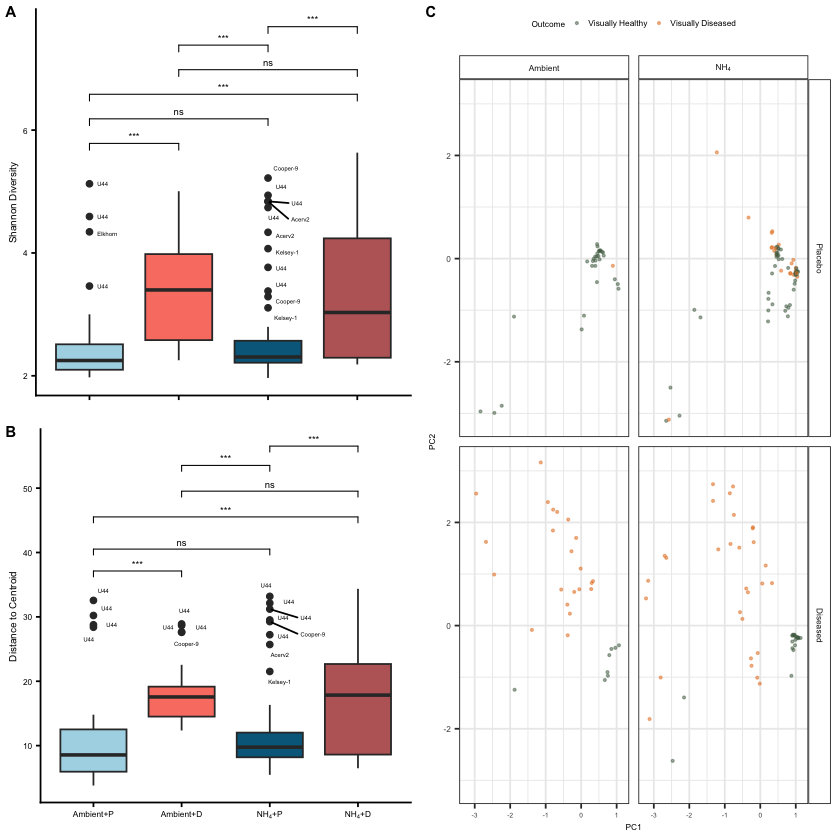

In [23]:
ggpubr::ggarrange(comboAB, ord_combo,
                  common.legend = FALSE,
                labels = c("", "C"), font.label = list(size = 9))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Fig2.png", 
      width = 5.5, height = 5.5, units = "in", dpi=300)

## Supplemental Fig 1

In [24]:
## Alpha diversity
ps_Clipped_A_P =subset_samples(ps_Clipped, Combo=="Ambient_Placebo")
ps_Clipped_A_P

ps_Clipped_A_P_fil = filter_taxa(ps_Clipped_A_P, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_Clipped_A_P_fil 
(ps_rare_A_P_fil <- phyloseq::rarefy_even_depth(ps_Clipped_A_P_fil, rngseed = 123, replace = FALSE, sample.size=12478))             

adiv_AP <- data.frame(
  "Simpson" = phyloseq::estimate_richness(ps_rare_A_P_fil, measures = "Simpson"),
  "Shannon" = phyloseq::estimate_richness(ps_rare_A_P_fil, measures = "Shannon"),
  "Genotype" = phyloseq::sample_data(ps_rare_A_P_fil)$Genotype) %>% rownames_to_column("sample_names")
head(adiv_AP)                                 
df_AP <- meta %>%
  right_join(adiv_AP,
            by = "sample_names") 
head(df_AP)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1298 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 1298 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1298 tips and 1254 internal nodes ]

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

28OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1270 taxa and 31 samples ]
sample_data() Sample Data:       [ 31 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 1270 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1270 tips and 1226 internal nodes ]

,sample_names,Simpson,Shannon,Genotype
,<chr>,<dbl>,<dbl>,<chr>
1,N15-A017,0.9070265,2.623859,Cooper-9
2,N211-A191,0.8926640,2.352274,FM19
3,N215-250,0.9031895,2.577862,FM6
4,N220-334,0.8906719,2.290018,FM9
5,N102-A012,0.8599785,2.026386,Kelsey-1
6,N103-A028,0.8670362,2.160980,Cooper-9


,sample_names,featurecounts,Initial_sample_ID,Tag,start_date,event_date,collection_date,Date,TimePoint,Replicate,⋯,Well_Position,Sequence_Name,Illumina5_Adapter,Forward_Primer_Pad,Golay_Barcode,X515FB_Forward_Primer,Primer_For_PCR,Simpson,Shannon,Genotype.y
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,N85-A055,31470,85,A055,8/19/20,11/3/20,11/3/20,3-Nov,12,r1_w,⋯,D09,515rcbc44,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.8588913,2.038373,Acerv2
2,N94-A091,78835,94,A091,8/19/20,11/4/20,11/4/20,4-Nov,13,r1_w,⋯,C10,515rcbc33,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.9821350,4.597309,U44
3,N103-A028,38507,103,A028,8/19/20,11/5/20,11/5/20,5-Nov,14,r1_w,⋯,D11,515rcbc46,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.8670362,2.160980,Cooper-9
4,N104-276,20691,104,276,8/19/20,11/5/20,11/5/20,5-Nov,14,r1_w,⋯,E11,515rcbc58,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.8588203,2.030680,FM14
5,N121-A160,29131,121,A160,8/19/20,11/5/20,11/5/20,5-Nov,14,r1_w,⋯,F01,515rcbc156,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,ATATGTTCTCAA,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTATATGTTCTCAATATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.8592832,2.030608,K2
6,N102-A012,13157,102,A012,8/19/20,11/5/20,11/5/20,5-Nov,14,r1_w,⋯,C11,515rcbc34,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,0.8599785,2.026386,Kelsey-1


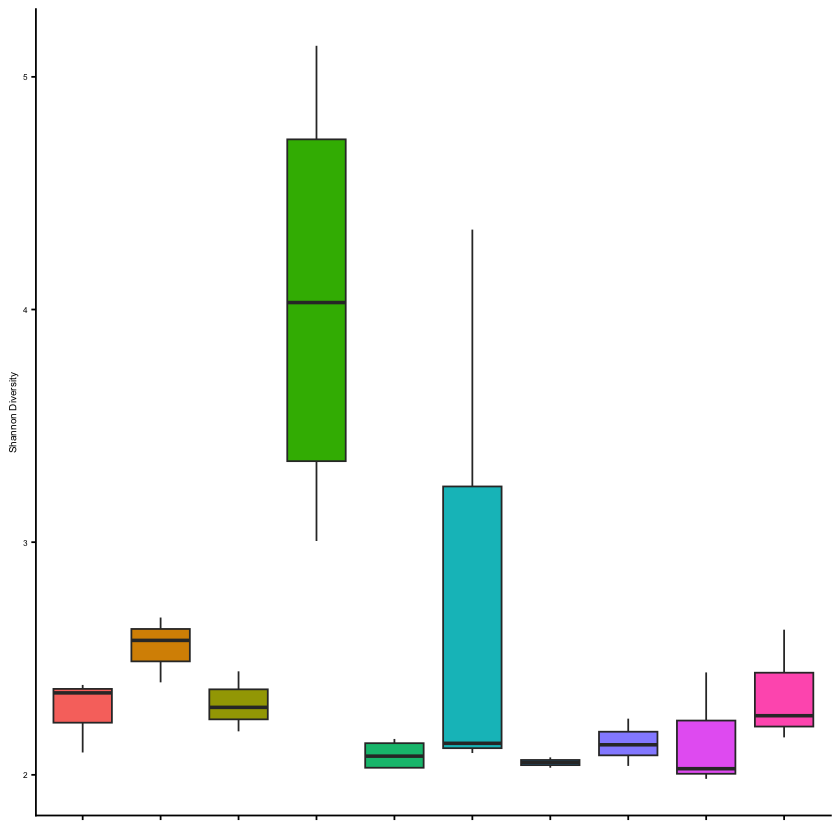

In [25]:
df_AP$Genotype.y <- factor(df_AP$Genotype.y, levels = c(
  "FM19", "FM6", "FM9", "U44", "FM14", "Elkhorn", "K2",
  "Acerv2", "Kelsey-1", "Cooper-9"))

Fig_sha_geno= df_AP %>%

  mutate(Shannon = as.numeric(Shannon)) %>%
  ggplot(aes(x = Genotype.y, y = Shannon)) +
  geom_boxplot(aes(fill = Genotype.y)) +
  theme_classic() +
  labs(y = "Shannon Diversity", x = "") +
  theme(
    legend.position = "none",
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    axis.title.x = element_text(size = 4),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 5)
  )
Fig_sha_geno

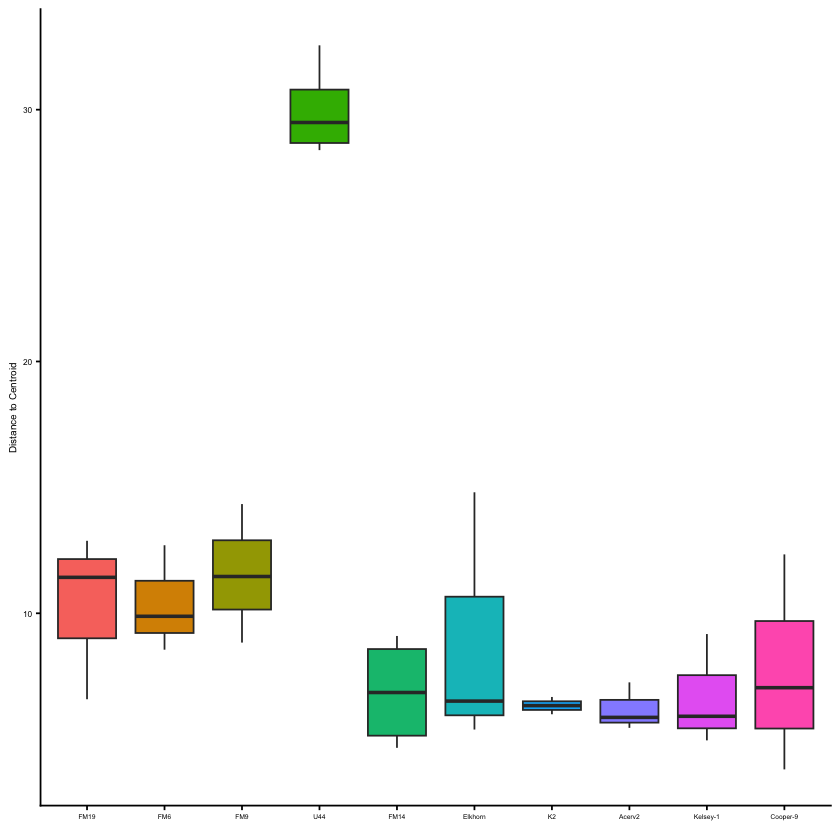

In [26]:
mod_dist_df$Genotype <- factor(mod_dist_df$Genotype, levels = c(
  "FM19", "FM6", "FM9", "U44", "FM14", "Elkhorn", "K2",
  "Acerv2", "Kelsey-1", "Cooper-9"
))


# Step 1: Add an internal distances column if needed
mod_dist_df$Distance <- mod$distances  # Add distances as a column


# Step 3: Plot, labeling only outliers
Fig_cent_geno=
mod_dist_df %>%
filter(Combo=="Ambient_Placebo") %>%
filter(Type=="Clipped") %>%

ggplot(aes(x = Genotype, y = Distance)) +
  geom_boxplot(aes(fill = Genotype)) +


  theme_classic() +
  theme(
    legend.position = "none",
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    axis.title.x = element_text(size = 4),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 5)
  ) +
  xlab("") +
  ylab("Distance to Centroid") 
Fig_cent_geno

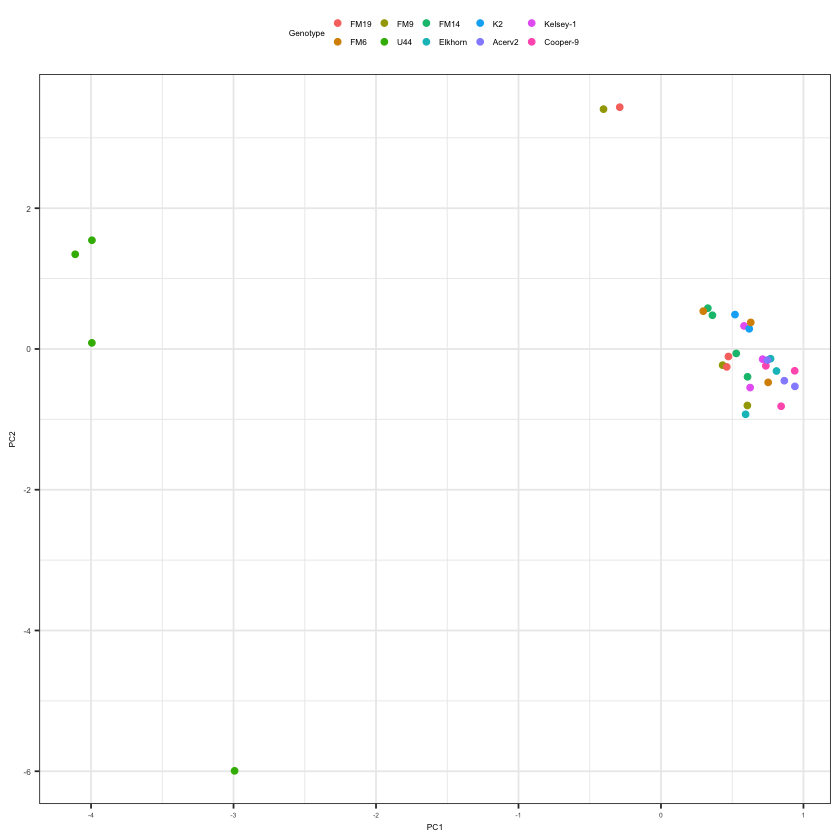

In [27]:
ord_data <- plot_ordination(ps_Am_Pl_c_clr, ps_Am_Pl_c_ord, justDF = TRUE)

# Add metadata
ord_data$Genotype <- sample_data(ps_Am_Pl_c)$Genotype

ord_data$Genotype <- factor(ord_data$Genotype, levels = c(
  "FM19", "FM6", "FM9", "U44", "FM14", "Elkhorn", "K2",
  "Acerv2", "Kelsey-1", "Cooper-9"
))

# Rebuild the plot
Fig_ord_geno <- ord_data %>%

ggplot(aes(PC1, PC2, 
           color = Genotype,
          
          )) +
 geom_point() +
  theme_bw() +
  theme(
    strip.background = element_rect(fill = "white"),
    legend.position = 'top',
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 5),
    strip.text.x = element_text(size = 5),
    strip.text.y = element_text(size = 5)
  ) +
  guides(color = guide_legend(keywidth = 0.2, keyheight = 0.4, nrow=2), shape=guide_legend(ncol=1))

Fig_ord_geno 

In [28]:
genoAB= ggpubr::ggarrange(Fig_sha_geno, Fig_cent_geno,
                  common.legend = FALSE, ncol=1,
                labels = c("A", "B"), font.label = list(size = 9))

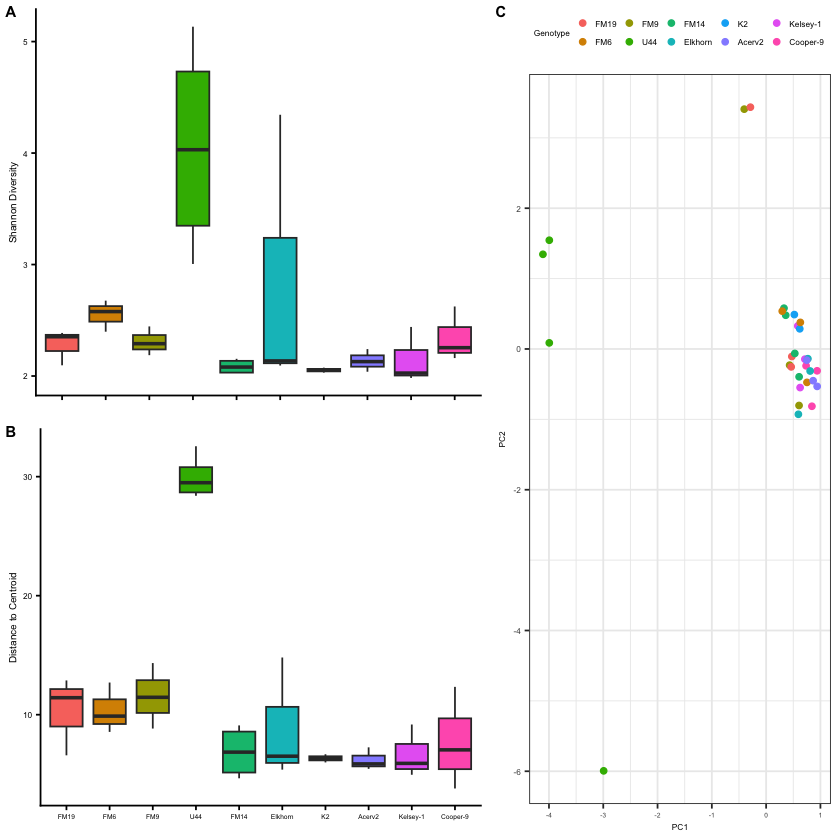

In [29]:
ggpubr::ggarrange(genoAB, Fig_ord_geno,
                  common.legend = FALSE, widths = c(1.4, 1),
                labels = c("", "C"), font.label = list(size = 9))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/SuppFig1.png", 
      width = 5, height = 4, units = "in", dpi=300)

## Supplemental Fig 2

In [30]:
first_hom=c("N88-Hom-H", "N88-Hom-H-R2", "N87-Hom-D", "N87-Hom-D-R2")


ps_homgenate=subset_samples(ps_pre, Type=="Homogenate"& sample_names %in% first_hom)
ps_homgenate

ps_homgenate = filter_taxa(ps_homgenate, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_homgenate 


sum_homogenate   <- ps_homgenate %>%
  #tax_glom(taxrank = "Family") %>%
  #transform_sample_counts(function(x) {x/sum(x)*100} ) %>% # Transform to rel. abundance
  psmelt()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 467 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 467 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 467 tips and 458 internal nodes ]

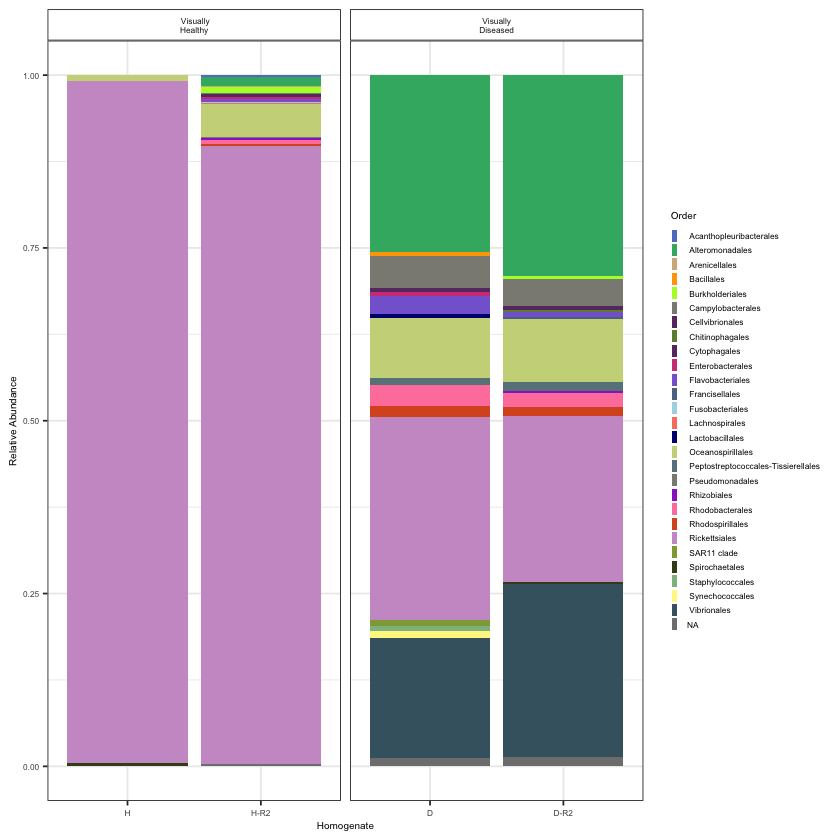

In [31]:

supp.labs <- c("AH" = " Visually\nHealthy", "DL" = "Visually\nDiseased")


fig_supp2 <- sum_homogenate %>%
  mutate(across(where(is.character), ~ str_replace_all(., "N88-Hom-H", "H"))) %>%
  mutate(across(where(is.character), ~ str_replace_all(., "N87-Hom-D", "D"))) %>%

  mutate(rel_abund = (Abundance / sum(Abundance)) * 100) %>%
  filter(rel_abund > 0.05) %>%
  mutate(across(where(is.character), ~ stringr::str_replace_all(., "o__", ""))) %>%
  mutate(across(where(is.character), ~ stringr::str_replace_all(., "_", " "))) %>%
  ggplot(aes(x = sample_names, y = rel_abund, fill = Order)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_fill_manual(values = c(
"#5F7FC7", "#3CB371","tan","orange","#ADFF2F", 
                           "ivory4", "#673770",  "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724"
                           ,"#8fa74"
  )) +
  theme_bw() +
  labs(x = "Homogenate", y = "Relative Abundance") +
  guides(fill = guide_legend(keywidth = 0.30, keyheight = 0.60, ncol = 1)) +
  theme(
    strip.background = element_rect(fill = "white"),
    axis.text.x = element_text(size = 5),
    axis.text.y = element_text(size = 5),
    axis.title.x = element_text(size = 6),
    axis.title.y = element_text(size = 6),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6),
    strip.text.x = element_text(size = 5),
    strip.text.y = element_text(size = 5)
  ) +
  facet_grid(. ~ Health, scales = "free", space = "free", labeller = labeller(Health = supp.labs))

# Print the plot
fig_supp2
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/SuppFig2.png", 
      width = 4, height = 4, units = "in", dpi=300)

## Relative abundance analysis 

In [32]:
library(data.table)
#run function to summarize relative abundance 
fast_melt = function(physeq){
  # supports "naked" otu_table as `physeq` input.
  otutab = as(otu_table(physeq), "matrix")
  if(!taxa_are_rows(physeq)){otutab <- t(otutab)}
  otudt = data.table(otutab, keep.rownames = TRUE)
  setnames(otudt, "rn", "taxaID")
  # Enforce character taxaID key
  otudt[, taxaIDchar := as.character(taxaID)]
  otudt[, taxaID := NULL]
  setnames(otudt, "taxaIDchar", "taxaID")
  # Melt count table
  mdt = melt.data.table(otudt, 
                        id.vars = "taxaID",
                        variable.name = "SampleID",
                        value.name = "count")
  # Remove zeroes, NAs
  mdt <- mdt[count > 0][!is.na(count)]
  # Calculate relative abundance
  mdt[, RelativeAbundance := count / sum(count), by = SampleID]
  if(!is.null(tax_table(physeq, errorIfNULL = FALSE))){
    # If there is a tax_table, join with it. Otherwise, skip this join.
    taxdt = data.table(as(tax_table(physeq, errorIfNULL = TRUE), "matrix"), keep.rownames = TRUE)
    setnames(taxdt, "rn", "taxaID")
    # Enforce character taxaID key
    taxdt[, taxaIDchar := as.character(taxaID)]
    taxdt[, taxaID := NULL]
    setnames(taxdt, "taxaIDchar", "taxaID")
    # Join with tax table
    setkey(taxdt, "taxaID")
    setkey(mdt, "taxaID")
    mdt <- taxdt[mdt]
  }
  return(mdt)
}

summarize_taxa = function(physeq, Rank, GroupBy = NULL){
  Rank <- Rank[1]
  if(!Rank %in% rank_names(physeq)){
    message("The argument to `Rank` was:\n", Rank,
            "\nBut it was not found among taxonomic ranks:\n",
            paste0(rank_names(physeq), collapse = ", "), "\n",
            "Please check the list shown above and try again.")
  }
  if(!is.null(GroupBy)){
    GroupBy <- GroupBy[1]
    if(!GroupBy %in% sample_variables(physeq)){
      message("The argument to `GroupBy` was:\n", GroupBy,
              "\nBut it was not found among sample variables:\n",
              paste0(sample_variables(physeq), collapse = ", "), "\n",
              "Please check the list shown above and try again.")
    }
  }
  # Start with fast melt
  mdt = fast_melt(physeq)
  if(!is.null(GroupBy)){
    # Add the variable indicated in `GroupBy`, if provided.
    sdt = data.table(SampleID = sample_names(physeq),
                     var1 = get_variable(physeq, GroupBy))
    setnames(sdt, "var1", GroupBy)
    # Join
    setkey(sdt, SampleID)
    setkey(mdt, SampleID)
    mdt <- sdt[mdt]
  }
  # Summarize
Nsamples = nsamples(physeq)
  summarydt = mdt[, list(meanRA = (sum(RelativeAbundance)/Nsamples)*100,
                         sdRA = sd(RelativeAbundance)*100,
                         minRA = min(RelativeAbundance)*100,
                         maxRA = max(RelativeAbundance)*100),
                  by = c(Rank, GroupBy)]
  return(summarydt)
}


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [33]:
#Get mean RA
#selected_ASVs=c("ASV_1970","ASV_2240", "ASV_6512","ASV_4206","ASV_2386","ASV_10105", "ASV_7422")
summarize_taxa(ps_Am_Pl_c, GroupBy="Genotype", Rank="Order") %>%
#filter(ASVs %in% selected_ASVs) %>%
arrange(-meanRA) %>%
filter(Genotype=="U44") %>% head()

Order,Genotype,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Oceanospirillales,U44,5.8145093,3.3324559,0.014161966,10.649798
o__Spirochaetales,U44,2.1783078,1.2693465,0.063728846,4.801525
o__Rhodobacterales,U44,0.9668618,0.3547052,0.129818019,2.087013
o__Alteromonadales,U44,0.8014885,0.2454164,0.015687095,1.324719
o__Campylobacterales,U44,0.5395257,0.2991265,0.156870948,1.199406
o__Flavobacteriales,U44,0.3067698,0.2577701,0.007813721,1.092312


In [34]:
summarize_taxa(ps_Am_Pl_c, GroupBy="Outcome", Rank="Order") %>%
#filter(ASVs %in% selected_ASVs) %>%
arrange(-meanRA) %>% head()

Order,Outcome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rickettsiales,Healthy,77.993937,5.6235449,0.009220272,17.983669
o__Oceanospirillales,Healthy,6.737925,2.5471571,0.006146848,10.649798
o__Rickettsiales,Unhealthy,2.907381,4.1845990,0.215259507,12.795982
o__Spirochaetales,Healthy,2.819171,1.0450065,0.022234987,4.801525
o__Rhodobacterales,Healthy,1.836179,0.3007031,0.040318516,2.087013
o__Alteromonadales,Healthy,1.070254,0.2260256,0.006231112,1.324719


In [35]:
#Get mean RA
#selected_ASVs=c("ASV_1970","ASV_2240", "ASV_6512","ASV_4206","ASV_2386","ASV_10105", "ASV_7422")
summarize_taxa(ps_Am_Pl_c, GroupBy="Genotype", Rank="Order") %>%
#filter(ASVs %in% selected_ASVs) %>%
arrange(-meanRA) %>%
filter(Genotype=="Acerv2") %>% head(n=10)

Order,Genotype,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rickettsiales,Acerv2,9.275882822,5.744396064,0.28156944,17.98366875
o__Corynebacteriales,Acerv2,0.160485532,0.580439200,0.68249985,1.93308550
o__Spirochaetales,Acerv2,0.146744705,0.201658167,0.15302687,0.80855019
o__Rhodobacterales,Acerv2,0.030752765,0.116662152,0.05143702,0.34077027
o__Myxococcales,Acerv2,0.026756483,0.130190985,0.04182156,0.36005915
o__Flavobacteriales,Acerv2,0.009143782,0.154433172,0.03252788,0.25092937
o__Vibrionales,Acerv2,0.006409803,0.063215494,0.05465184,0.14405204
o__Alteromonadales,Acerv2,0.006145821,0.003285812,0.09293680,0.09758364
o__Oceanospirillales,Acerv2,0.003297758,NA,0.10223048,0.10223048


In [36]:
tax_table(subset_taxa(ps_Clipped, taxa_names(ps_Clipped) %in% selected_otus))

,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
317148b78ed8ecbf25c5448e8b5e0cf5,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,NA,NA,ASV_1970
a3c29bcb6997cfe572a474e58291af1d,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,NA,ASV_6512
68dd9c00e0187d0e3541a2535f1290d9,d__Bacteria,p__Campilobacterota,c__Campylobacteria,o__Campylobacterales,f__Helicobacteraceae,g__uncultured,s__uncultured_bacterium,ASV_4206
3af784892462923aa0bdd45788f7e9b7,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Endozoicomonadaceae,g__Endozoicomonas,s__Acropora_cervicornis,ASV_2386
ff3e7637bd5aac86cff3b72f9ee78f47,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105


In [37]:
#Get mean RA
selected_ASVs=c("ASV_1970","ASV_6512","ASV_4206","ASV_2386","ASV_10105")
summarize_taxa(ps_Clipped, GroupBy="Combo", Rank="ASVs") %>%
filter(ASVs %in% selected_ASVs) %>%
arrange(Combo, -meanRA) #%>%
#filter(Genotype=="Cooper-9") %>% head()

ASVs,Combo,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV_10105,Ambient_Pathogen,1.829843067,5.2519050,1.58962650,30.9230769
ASV_6512,Ambient_Pathogen,0.027811824,NA,4.83925741,4.8392574
ASV_1970,Ambient_Pathogen,0.020331830,0.2557494,0.24675562,0.9714463
ASV_2386,Ambient_Pathogen,0.020005516,0.2264116,0.16178663,0.7813446
ASV_4206,Ambient_Pathogen,0.002454007,NA,0.42699725,0.4269972
ASV_10105,Ambient_Placebo,2.505963231,2.1014171,8.67012939,17.9836687
ASV_2386,Ambient_Placebo,0.143020004,4.3451998,0.01852979,10.6497982
ASV_6512,Ambient_Placebo,0.055445206,1.6343173,0.32055439,4.8015246
ASV_1970,Ambient_Placebo,0.022688428,0.3612332,0.12085441,1.2198039


In [38]:
#Get mean RA
selected_ASVs=c("ASV_10105")
summarize_taxa(ps_Clipped, GroupBy="Combo", Rank="ASVs") %>%
filter(ASVs %in% selected_ASVs) %>%
arrange(Combo, -meanRA)

ASVs,Combo,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ASV_10105,Ambient_Pathogen,1.829843,5.251905,1.5896265,30.92308
ASV_10105,Ambient_Placebo,2.505963,2.101417,8.6701294,17.98367
ASV_10105,NH4_Pathogen,2.815802,4.548190,0.4830068,16.86735
ASV_10105,NH4_Placebo,4.932953,3.583743,0.3128718,18.42391
